In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df_exp=pd.read_csv('download_samples_tsv.tsv',sep='\t')

In [3]:
df_exp.columns

Index(['#sid', 'name', 'note', 'sample_env', 'keywords_clean', 'taxa_stats',
       'num_rids', 'num_hq_runs', 'rids', 'projects', 'publications'],
      dtype='object')

In [4]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #sid            724 non-null    object 
 1   name            724 non-null    object 
 2   note            0 non-null      float64
 3   sample_env      724 non-null    object 
 4   keywords_clean  724 non-null    object 
 5   taxa_stats      723 non-null    object 
 6   num_rids        724 non-null    int64  
 7   num_hq_runs     664 non-null    float64
 8   rids            724 non-null    object 
 9   projects        724 non-null    object 
 10  publications    724 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 62.3+ KB


In [5]:
data = []
for _, row in df_exp.iterrows():  
    ers_id = row['#sid']
    keywords = row['keywords_clean']
    rids=row['rids']
    
    # Classify by specific allergen type
    if 'milk' in keywords or 'dairy food' in keywords:
        label = 'allergic'
        allergen_group = 'MILK'
    elif 'sesame' in keywords:
        label = 'allergic'
        allergen_group = 'SESAME'
    elif 'peanut' in keywords:
        label = 'allergic'
        allergen_group = 'PEANUT'
    elif 'walnut' in keywords or 'hazelnut' in keywords or 'nuts' in keywords:
        label = 'allergic'
        allergen_group = 'TREE_NUTS'
    elif 'egg' in keywords:
        label = 'allergic'
        allergen_group = 'EGG'
    else:
        # Samples without specific allergen keywords are controls
        label = 'healthy'
        allergen_group = 'CONTROL'
    
    data.append({
        'ERS_ID': ers_id, 
        'Label': label,
        'Allergen_Group': allergen_group,
        'rids':rids
    })

# Crea il nuovo dataframe
result_df_exp = pd.DataFrame(data)


In [6]:
result_df_exp.head(10)

,ERS_ID,Label,Allergen_Group,rids
0,ERS4516182,allergic,MILK,ERR4033678
1,ERS4516183,allergic,MILK,ERR4033679
2,ERS4516184,allergic,MILK,ERR4033680
3,ERS4516185,allergic,MILK,ERR4033681
4,ERS4516186,allergic,MILK,ERR4033682
5,ERS4516187,allergic,MILK,ERR4033683
6,ERS4516188,allergic,MILK,ERR4033684
7,ERS4516189,allergic,MILK,ERR4033685
8,ERS4516190,allergic,MILK,ERR4033686
9,ERS4516191,allergic,MILK,ERR4033687


In [7]:
result_df_exp.tail(10)

,ERS_ID,Label,Allergen_Group,rids
714,ERS4519304,allergic,SESAME,ERR4038127
715,ERS4519305,allergic,SESAME,ERR4038128
716,ERS4519306,allergic,SESAME,ERR4038129
717,ERS4519307,allergic,SESAME,ERR4038130
718,ERS4519308,allergic,SESAME,ERR4038131
719,ERS4519309,allergic,SESAME,ERR4038132
720,ERS4519310,allergic,SESAME,ERR4038133
721,ERS4519311,allergic,SESAME,ERR4038134
722,ERS4519312,allergic,SESAME,ERR4038135
723,ERS4519313,allergic,SESAME,ERR4038136


In [8]:
print(f"\nTotal samples: {len(result_df_exp)}")
print(f"\nGroup distribution:")
print(result_df_exp['Allergen_Group'].value_counts())


Total samples: 724

Group distribution:
Allergen_Group
MILK         322
SESAME       133
TREE_NUTS    129
PEANUT        55
CONTROL       51
EGG           34
Name: count, dtype: int64


In [9]:
# summary table
summary = result_df_exp['Allergen_Group'].value_counts().reset_index()
summary.columns = ['Allergen_Group', 'Count']
summary = summary.sort_values('Allergen_Group')
summary

,Allergen_Group,Count
4,CONTROL,51
5,EGG,34
0,MILK,322
3,PEANUT,55
1,SESAME,133
2,TREE_NUTS,129


In [10]:
# write csv file
result_df_exp_labels=result_df_exp.copy()
result_df_exp_labels.drop(['Allergen_Group'],axis=1, inplace=True)

In [11]:
result_df_exp_labels.head(10)

,ERS_ID,Label,rids
0,ERS4516182,allergic,ERR4033678
1,ERS4516183,allergic,ERR4033679
2,ERS4516184,allergic,ERR4033680
3,ERS4516185,allergic,ERR4033681
4,ERS4516186,allergic,ERR4033682
5,ERS4516187,allergic,ERR4033683
6,ERS4516188,allergic,ERR4033684
7,ERS4516189,allergic,ERR4033685
8,ERS4516190,allergic,ERR4033686
9,ERS4516191,allergic,ERR4033687


In [12]:
result_df_exp_labels.iloc[20:30]

,ERS_ID,Label,rids
20,ERS4516636,healthy,ERR4033809
21,ERS4516637,healthy,ERR4033810
22,ERS4516638,healthy,ERR4033811
23,ERS4516639,healthy,ERR4033812
24,ERS4516640,healthy,ERR4033813
25,ERS4516641,healthy,ERR4033814
26,ERS4516642,healthy,ERR4033815
27,ERS4516643,healthy,ERR4033816
28,ERS4516644,healthy,ERR4033817
29,ERS4516645,healthy,ERR4033818


In [13]:
result_df_exp_labels.tail(10)

,ERS_ID,Label,rids
714,ERS4519304,allergic,ERR4038127
715,ERS4519305,allergic,ERR4038128
716,ERS4519306,allergic,ERR4038129
717,ERS4519307,allergic,ERR4038130
718,ERS4519308,allergic,ERR4038131
719,ERS4519309,allergic,ERR4038132
720,ERS4519310,allergic,ERR4038133
721,ERS4519311,allergic,ERR4038134
722,ERS4519312,allergic,ERR4038135
723,ERS4519313,allergic,ERR4038136


In [14]:
result_df_exp_labels_renamed=result_df_exp_labels.replace({'Label':{'allergic':'1', 'healthy':'0'}})
result_df_exp_labels_renamed['Label'] = result_df_exp_labels_renamed['Label'].astype(int)
result_df_exp_labels_renamed=result_df_exp_labels_renamed[['ERS_ID','Label']]
result_df_exp_labels_renamed.head()

,ERS_ID,Label
0,ERS4516182,1
1,ERS4516183,1
2,ERS4516184,1
3,ERS4516185,1
4,ERS4516186,1


In [15]:
# result_df_exp_labels.to_csv('df_exp_labels.csv',index=False)
result_df_exp_labels_renamed.to_csv('to_use/df_exp_all_labels.csv',index=False)

In [16]:
# add time 

In [17]:
df_run = pd.read_csv('SraRunTable.csv')

In [18]:
# time of trials from anonymized_name 
# For milk:   P1.milk.T1      -> T1
# For sesame: Sesame.T7.193   -> T7
# For nuts:   P2.Nuts.T1      -> T1
def extract_trial(name):
    # Look for something like T0, T1, T2, ..., T15 (case-insensitive)
    m = re.search(r'[Tt](\d+)', name)
    if m:
        # Always return normalized 'T#'
        return 'T' + m.group(1)
    else:
        # No T# found (e.g. "Con28"); replace with empty field
        return ''

# recompute the column
df_run['Trial'] = df_run['anonymized_name'].apply(extract_trial)

In [19]:
df_run[['Run', 'anonymized_name', 'Trial']].head()

,Run,anonymized_name,Trial
0,ERR4033678,P1.milk.T1,T1
1,ERR4033679,P1.milk.T2,T2
2,ERR4033680,P24.milk.T1,T1
3,ERR4033681,P24.milk.T2,T2
4,ERR4033682,P24.milk.T3,T3


In [20]:
df_run[['Run', 'anonymized_name', 'Trial']].tail()

,Run,anonymized_name,Trial
723,ERR4038132,Sesame.T7.193,T7
724,ERR4038133,Sesame.T7.47,T7
725,ERR4038134,Sesame.T8.48,T8
726,ERR4038135,Sesame.T9.194,T9
727,ERR4038136,Sesame.T9.50,T9


In [21]:
result_df_exp.head()

,ERS_ID,Label,Allergen_Group,rids
0,ERS4516182,allergic,MILK,ERR4033678
1,ERS4516183,allergic,MILK,ERR4033679
2,ERS4516184,allergic,MILK,ERR4033680
3,ERS4516185,allergic,MILK,ERR4033681
4,ERS4516186,allergic,MILK,ERR4033682


In [22]:
# JOIN 
result_df_exp = result_df_exp.rename(columns={'rids': 'Run'})
df_merged = result_df_exp.merge(df_run[['Run', 'anonymized_name','Trial']], on='Run', how='left')
result_time_df_exp=df_merged.copy()
result_time_df_exp_renamed=result_time_df_exp.replace({'Label':{'allergic':'1','healthy':'0'}})
result_time_df_exp_renamed['Label'] = result_time_df_exp_renamed['Label'].astype(int)                                                                
#result_time_df_exp_renamed=result_time_df_exp_renamed[['Trial','ERS_ID','Label']]
result_time_df_exp_renamed.head()

,ERS_ID,Label,Allergen_Group,Run,anonymized_name,Trial
0,ERS4516182,1,MILK,ERR4033678,P1.milk.T1,T1
1,ERS4516183,1,MILK,ERR4033679,P1.milk.T2,T2
2,ERS4516184,1,MILK,ERR4033680,P24.milk.T1,T1
3,ERS4516185,1,MILK,ERR4033681,P24.milk.T2,T2
4,ERS4516186,1,MILK,ERR4033682,P24.milk.T3,T3


In [23]:
result_time_df_exp_renamed.iloc[50:55]

,ERS_ID,Label,Allergen_Group,Run,anonymized_name,Trial
50,ERS4516666,0,CONTROL,ERR4033839,Con4,
51,ERS4516667,0,CONTROL,ERR4033840,Con5,
52,ERS4516668,0,CONTROL,ERR4033841,Con6,
53,ERS4516669,0,CONTROL,ERR4033842,Con7,
54,ERS4516670,0,CONTROL,ERR4033843,Con8,


In [24]:
result_time_df_exp_renamed.tail()

,ERS_ID,Label,Allergen_Group,Run,anonymized_name,Trial
719,ERS4519309,1,SESAME,ERR4038132,Sesame.T7.193,T7
720,ERS4519310,1,SESAME,ERR4038133,Sesame.T7.47,T7
721,ERS4519311,1,SESAME,ERR4038134,Sesame.T8.48,T8
722,ERS4519312,1,SESAME,ERR4038135,Sesame.T9.194,T9
723,ERS4519313,1,SESAME,ERR4038136,Sesame.T9.50,T9


In [25]:
result_time_df_exp_renamed.isna().sum()

ERS_ID             0
Label              0
Allergen_Group     0
Run                0
anonymized_name    0
Trial              0
dtype: int64

In [26]:
# 1) Extract patient_ID from anonymized_name
def extract_patient_id(name: str) -> str:
    s = str(name)
    # Case 1: starts with P + digits  (e.g. P1.milk.T1 -> P1)
    m = re.match(r'^(P\d+)', s)
    if m:
        return m.group(1)
    # Case 2: last part is numeric (e.g. Sesame.T7.193 -> 193)
    m2 = re.search(r'\.(\d+)$', s)
    if m2:
        return m2.group(1)
    # Fallback: return the full string if no clear pattern
    return s

result_time_df_exp_renamed['patient_ID'] = (
    result_time_df_exp_renamed['anonymized_name'].apply(extract_patient_id)
)




In [27]:
result_time_df_exp_renamed.head()

,ERS_ID,Label,Allergen_Group,Run,anonymized_name,Trial,patient_ID
0,ERS4516182,1,MILK,ERR4033678,P1.milk.T1,T1,P1
1,ERS4516183,1,MILK,ERR4033679,P1.milk.T2,T2,P1
2,ERS4516184,1,MILK,ERR4033680,P24.milk.T1,T1,P24
3,ERS4516185,1,MILK,ERR4033681,P24.milk.T2,T2,P24
4,ERS4516186,1,MILK,ERR4033682,P24.milk.T3,T3,P24


In [28]:
detailed_summary_list = []

for patient_id, group in result_time_df_exp_renamed.groupby('patient_ID'):
    # Filter out empty trials
    trials_group = group[group['Trial'] != ''].copy()
    
    if len(trials_group) == 0:
        # For patients without trial information
        allergens = group['Allergen_Group'].unique().tolist()
        allergens_str = ', '.join([a.lower() for a in allergens if a != 'CONTROL'])
        if not allergens_str:
            allergens_str = 'control'
        
        detailed_summary_list.append({
            'patient_ID': patient_id,
            'number_of_trials': 0,
            'enrollment': 'N/A',
            'allergens': allergens_str,
            'last_timepoint': 'N/A'
        })
    else:
        # Sort trials to get first and last
        trials_group = trials_group.sort_values('Trial')
        
        # Number of trials
        num_trials = len(trials_group)
        
        # First timepoint (enrollment)
        first_timepoint = trials_group['Trial'].iloc[0]
        
        # Last timepoint
        last_timepoint = trials_group['Trial'].iloc[-1]
        
        # Allergens (unique across all trials)
        allergens = trials_group['Allergen_Group'].unique().tolist()
        # Convert to lowercase and filter out CONTROL
        allergens_clean = [a.lower() for a in allergens if a != 'CONTROL']
        if not allergens_clean:
            allergens_clean = ['control']
        allergens_str = ', '.join(sorted(allergens_clean))
        
        detailed_summary_list.append({
            'patient_ID': patient_id,
            'number_of_trials': num_trials,
            'enrollment': first_timepoint,
            'allergens': allergens_str,
            'last_timepoint': last_timepoint
        })

# Create detailed summary DataFrame
detailed_summary = pd.DataFrame(detailed_summary_list)
dett_summary = detailed_summary.sort_values(
    ['number_of_trials', 'patient_ID'], ascending=[False, True]
).reset_index(drop=True)



In [29]:
dett_summary

,patient_ID,number_of_trials,enrollment,allergens,last_timepoint
0,P1,17,T1,"milk, tree_nuts",T7
1,P5,14,T1,"milk, tree_nuts",T8
2,P9,13,T0,"milk, tree_nuts",T6
3,P2,12,T1,"milk, tree_nuts",T5
4,P6,12,T1,"milk, tree_nuts",T5
...,...,...,...,...,...
562,Con5,0,N/A,control,N/A
563,Con6,0,N/A,control,N/A
564,Con7,0,N/A,control,N/A
565,Con8,0,N/A,control,N/A


In [30]:
#dett_summary.to_csv("summary_analysis.csv", index=False)

In [31]:
trial_counts = detailed_summary['number_of_trials'].value_counts().sort_index()

riep_summary = pd.DataFrame({
    'n_trials': trial_counts.index,
    'number_of_patients': trial_counts.values
})

riep_summary['percentage'] = (riep_summary['number_of_patients'] / riep_summary['number_of_patients'].sum() * 100).round(2)



In [32]:
riep_summary

,n_trials,number_of_patients,percentage
0,0,51,8.99
1,1,483,85.19
2,2,12,2.12
3,3,4,0.71
4,4,1,0.18
5,5,3,0.53
6,6,3,0.53
7,8,1,0.18
8,9,1,0.18
9,10,2,0.35


In [33]:
# Subsets for T0 and T1 - EXCLUDING CONTROLS
t0 = result_time_df_exp_renamed[
    (result_time_df_exp_renamed['Trial'] == 'T0') & 
    (result_time_df_exp_renamed['Allergen_Group'] != 'CONTROL')
]
t1 = result_time_df_exp_renamed[
    (result_time_df_exp_renamed['Trial'] == 'T1') & 
    (result_time_df_exp_renamed['Allergen_Group'] != 'CONTROL')
]

patients_t0 = set(t0['patient_ID'])
patients_t1 = set(t1['patient_ID'])

both_t0_t1 = patients_t0 & patients_t1
only_t0    = patients_t0 - patients_t1
only_t1    = patients_t1 - patients_t0

print("Patients with T0:", len(patients_t0))
print("Patients with T1:", len(patients_t1))
print("Patients with both T0 and T1:", len(both_t0_t1))
print("Patients only in T0:", len(only_t0))
print("Patients only in T1:", len(only_t1))

# Allergen comparison for patients in both T0 and T1
records_t0_t1 = []
for pid in sorted(both_t0_t1):
    a0 = sorted(set(t0[t0['patient_ID'] == pid]['Allergen_Group']))
    a1 = sorted(set(t1[t1['patient_ID'] == pid]['Allergen_Group']))
    records_t0_t1.append({
        'patient_ID': pid,
        'allergens_T0': ", ".join(a0),
        'allergens_T1': ", ".join(a1),
        'same_allergens': a0 == a1
    })

t0_t1_allergen_summary = pd.DataFrame(records_t0_t1)
t0_t1_allergen_summary



Patients with T0: 13
Patients with T1: 186
Patients with both T0 and T1: 3
Patients only in T0: 10
Patients only in T1: 183


,patient_ID,allergens_T0,allergens_T1,same_allergens
0,P7,TREE_NUTS,"MILK, TREE_NUTS",False
1,P8,TREE_NUTS,TREE_NUTS,True
2,P9,TREE_NUTS,"MILK, TREE_NUTS",False


In [34]:
# - EXCLUDING CONTROLS
# Subset: extract T3
t3 = result_time_df_exp_renamed[
    (result_time_df_exp_renamed['Trial'] == 'T3') & 
    (result_time_df_exp_renamed['Allergen_Group'] != 'CONTROL')
]


# Subset: ≥T4 using regex T followed by 4–9
ge4 = result_time_df_exp_renamed[
    (result_time_df_exp_renamed['Trial'].str.match(r'^T[4-9]\d*$')) &
    (result_time_df_exp_renamed['Allergen_Group'] != 'CONTROL')
]

patients_t3  = set(t3['patient_ID'])
patients_ge4 = set(ge4['patient_ID'])

both_t3_ge4 = patients_t3 & patients_ge4
only_t3     = patients_t3 - patients_ge4
only_ge4    = patients_ge4 - patients_t3

print("Patients with T3:", len(patients_t3))
print("Patients with ≥T4:", len(patients_ge4))
print("Patients with both:", len(both_t3_ge4))

# Allergen comparison
records_t3_ge4 = []
for pid in sorted(both_t3_ge4):
    a3 = sorted(set(t3[t3['patient_ID'] == pid]['Allergen_Group']))
    a_ge4 = sorted(set(ge4[ge4['patient_ID'] == pid]['Allergen_Group']))
    records_t3_ge4.append({
        'patient_ID': pid,
        'allergens_T3': ", ".join(a3),
        'allergens_geT4': ", ".join(a_ge4),
        'same_allergens': a3 == a_ge4
    })

t3_ge4_allergen_summary = pd.DataFrame(records_t3_ge4)
t3_ge4_allergen_summary


Patients with T3: 92
Patients with ≥T4: 151
Patients with both: 15


,patient_ID,allergens_T3,allergens_geT4,same_allergens
0,P1,"MILK, TREE_NUTS","MILK, TREE_NUTS",True
1,P10,"MILK, TREE_NUTS",TREE_NUTS,False
2,P12,"MILK, TREE_NUTS",TREE_NUTS,False
3,P15,MILK,MILK,True
4,P2,"MILK, TREE_NUTS",TREE_NUTS,False
5,P24,MILK,MILK,True
6,P25,MILK,MILK,True
7,P27,MILK,MILK,True
8,P3,"MILK, TREE_NUTS",TREE_NUTS,False
9,P4,"MILK, TREE_NUTS",TREE_NUTS,False


In [35]:
# - EXCLUDING CONTROLS
# Subset: extract T4
t4 = result_time_df_exp_renamed[
    (result_time_df_exp_renamed['Trial'] == 'T4') &
    (result_time_df_exp_renamed['Allergen_Group'] != 'CONTROL')
]

# Subset: ≥T5 using regex
ge5 = result_time_df_exp_renamed[
    (result_time_df_exp_renamed['Trial'].str.match(r'^T[5-9]\d*$')) &
    (result_time_df_exp_renamed['Allergen_Group'] != 'CONTROL')
]

patients_t4  = set(t4['patient_ID'])
patients_ge5 = set(ge5['patient_ID'])

both_t4_ge5 = patients_t4 & patients_ge5
only_t4     = patients_t4 - patients_ge5
only_ge5    = patients_ge5 - patients_t4

print("Patients with T4:", len(patients_t4))
print("Patients with ≥T5:", len(patients_ge5))
print("Patients with both:", len(both_t4_ge5))

# Allergen comparison
records_t4_ge5 = []
for pid in sorted(both_t4_ge5):
    a4 = sorted(set(t4[t4['patient_ID'] == pid]['Allergen_Group']))
    a_ge5 = sorted(set(ge5[ge5['patient_ID'] == pid]['Allergen_Group']))
    records_t4_ge5.append({
        'patient_ID': pid,
        'allergens_T4': ", ".join(a4),
        'allergens_geT5': ", ".join(a_ge5),
        'same_allergens': a4 == a_ge5
    })

t4_ge5_allergen_summary = pd.DataFrame(records_t4_ge5)
t4_ge5_allergen_summary


Patients with T4: 68
Patients with ≥T5: 92
Patients with both: 9


,patient_ID,allergens_T4,allergens_geT5,same_allergens
0,P1,"MILK, TREE_NUTS",MILK,False
1,P10,TREE_NUTS,TREE_NUTS,True
2,P24,MILK,MILK,True
3,P27,MILK,MILK,True
4,P4,TREE_NUTS,TREE_NUTS,True
5,P5,"MILK, TREE_NUTS",TREE_NUTS,False
6,P6,TREE_NUTS,TREE_NUTS,True
7,P8,TREE_NUTS,"MILK, TREE_NUTS",False
8,P9,"MILK, TREE_NUTS","MILK, TREE_NUTS",True


In [36]:
# Build dataset with the interested columns
base_df = result_time_df_exp_renamed[['Trial', 'ERS_ID', 'Label']].copy()
base_df.head()


,Trial,ERS_ID,Label
0,T1,ERS4516182,1
1,T2,ERS4516183,1
2,T1,ERS4516184,1
3,T2,ERS4516185,1
4,T3,ERS4516186,1


In [37]:
# Mask for controls (Label = 0)
controls = base_df[base_df['Label'] == 0].copy()

# Dataset for T1: only allergic samples from T1 + all controls, all labeled as T1
t1_allergic = base_df[(base_df['Trial'] == 'T1') & (base_df['Label'] == 1)].copy()
t1_allergic['Trial'] = 'T1'
controls_T1 = controls.copy()
controls_T1['Trial'] = 'T1'
df_T1 = pd.concat([t1_allergic, controls_T1], axis=0).reset_index(drop=True)

# Dataset for T2: only allergic samples from T2 + all controls, all labeled as T1
t2_allergic = base_df[(base_df['Trial'] == 'T2') & (base_df['Label'] == 1)].copy()
t2_allergic['Trial'] = 'T2'
controls_T2 = controls.copy()
controls_T2['Trial'] = 'T2'
df_T2 = pd.concat([t2_allergic, controls_T2], axis=0).reset_index(drop=True)

# Dataset for T3: only allergic samples from T3 + all controls, all labeled as T1
t3_allergic = base_df[(base_df['Trial'] == 'T3') & (base_df['Label'] == 1)].copy()
t3_allergic['Trial'] = 'T3'
controls_T3 = controls.copy()
controls_T3['Trial'] = 'T3'
df_T3 = pd.concat([t3_allergic, controls_T3], axis=0).reset_index(drop=True)




In [38]:
# Quick sanity checks
print("df_T1 shape:", df_T1.shape)
print("df_T2 shape:", df_T2.shape)
print("df_T3 shape:", df_T3.shape)


df_T1 shape: (261, 3)
df_T2 shape: (192, 3)
df_T3 shape: (160, 3)


In [39]:
df_T1.to_csv("to_use/T1.csv", index=False)
df_T2.to_csv("to_use/T2.csv", index=False)
df_T3.to_csv("to_use/T3.csv", index=False)


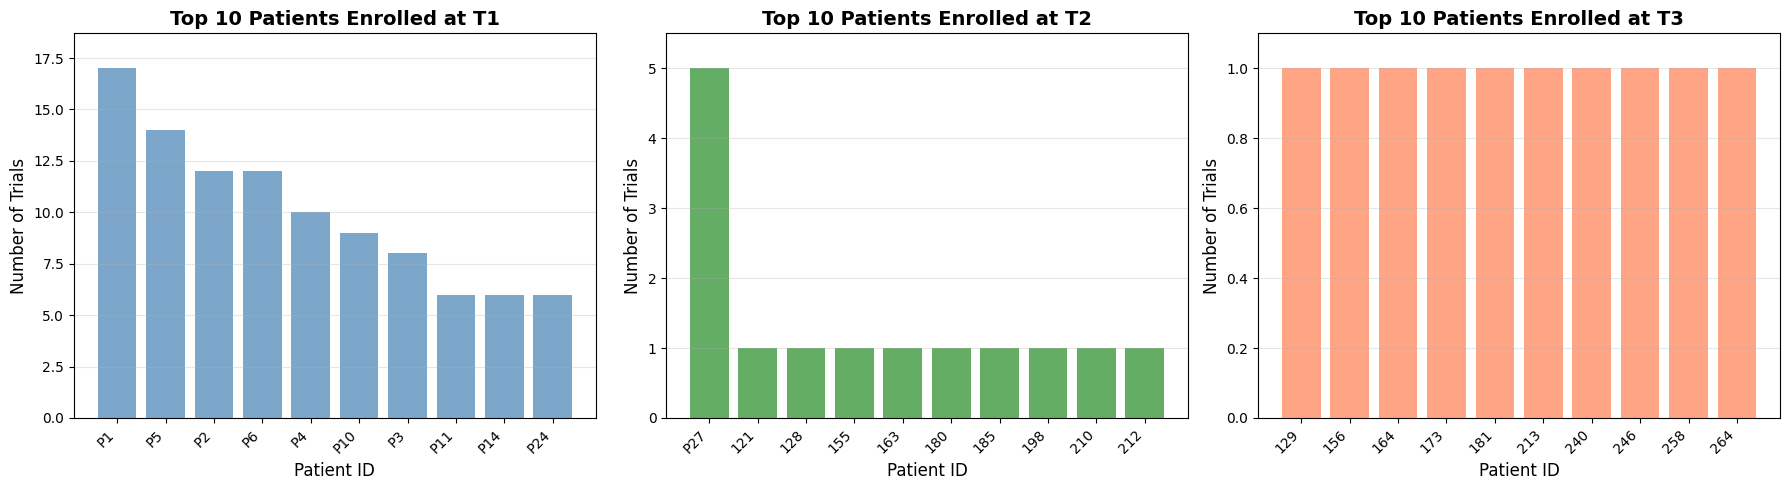


=== Summary Statistics ===

T1 Enrollment - Top 10 Patients:
  Total patients enrolled at T1 (non-control): 185
  Mean trials for top 10: 10.00
  Range: 6 - 17

T2 Enrollment - Top 10 Patients:
  Total patients enrolled at T2 (non-control): 96
  Mean trials for top 10: 1.40
  Range: 1 - 5

T3 Enrollment - Top 10 Patients:
  Total patients enrolled at T3 (non-control): 71
  Mean trials for top 10: 1.00
  Range: 1 - 1


In [40]:
# Filter out control patients (those with enrollment = 'N/A' or allergens = 'control')
patients_non_control = dett_summary[dett_summary['enrollment'] != 'N/A'].copy()

# Create separate dataframes for each enrollment timepoint
t1_patients = patients_non_control[patients_non_control['enrollment'] == 'T1']
t2_patients = patients_non_control[patients_non_control['enrollment'] == 'T2']
t3_patients = patients_non_control[patients_non_control['enrollment'] == 'T3']

# Get top 10 patients by number_of_trials for each timepoint
t1_top10 = t1_patients.nlargest(10, 'number_of_trials')
t2_top10 = t2_patients.nlargest(10, 'number_of_trials')
t3_top10 = t3_patients.nlargest(10, 'number_of_trials')

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for T1
axes[0].bar(range(len(t1_top10)), t1_top10['number_of_trials'], color='steelblue', alpha=0.7)
axes[0].set_xticks(range(len(t1_top10)))
axes[0].set_xticklabels(t1_top10['patient_ID'], rotation=45, ha='right')
axes[0].set_xlabel('Patient ID', fontsize=12)
axes[0].set_ylabel('Number of Trials', fontsize=12)
axes[0].set_title('Top 10 Patients Enrolled at T1', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, max(t1_top10['number_of_trials']) * 1.1)

# Plot for T2
axes[1].bar(range(len(t2_top10)), t2_top10['number_of_trials'], color='forestgreen', alpha=0.7)
axes[1].set_xticks(range(len(t2_top10)))
axes[1].set_xticklabels(t2_top10['patient_ID'], rotation=45, ha='right')
axes[1].set_xlabel('Patient ID', fontsize=12)
axes[1].set_ylabel('Number of Trials', fontsize=12)
axes[1].set_title('Top 10 Patients Enrolled at T2', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(t2_top10['number_of_trials']) * 1.1)

# Plot for T3
axes[2].bar(range(len(t3_top10)), t3_top10['number_of_trials'], color='coral', alpha=0.7)
axes[2].set_xticks(range(len(t3_top10)))
axes[2].set_xticklabels(t3_top10['patient_ID'], rotation=45, ha='right')
axes[2].set_xlabel('Patient ID', fontsize=12)
axes[2].set_ylabel('Number of Trials', fontsize=12)
axes[2].set_title('Top 10 Patients Enrolled at T3', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_ylim(0, max(t3_top10['number_of_trials']) * 1.1)

plt.tight_layout()
plt.savefig('top10_patients_by_enrollment.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===\n")
print(f"T1 Enrollment - Top 10 Patients:")
print(f"  Total patients enrolled at T1 (non-control): {len(t1_patients)}")
print(f"  Mean trials for top 10: {t1_top10['number_of_trials'].mean():.2f}")
print(f"  Range: {t1_top10['number_of_trials'].min()} - {t1_top10['number_of_trials'].max()}")

print(f"\nT2 Enrollment - Top 10 Patients:")
print(f"  Total patients enrolled at T2 (non-control): {len(t2_patients)}")
print(f"  Mean trials for top 10: {t2_top10['number_of_trials'].mean():.2f}")
print(f"  Range: {t2_top10['number_of_trials'].min()} - {t2_top10['number_of_trials'].max()}")

print(f"\nT3 Enrollment - Top 10 Patients:")
print(f"  Total patients enrolled at T3 (non-control): {len(t3_patients)}")
print(f"  Mean trials for top 10: {t3_top10['number_of_trials'].mean():.2f}")
print(f"  Range: {t3_top10['number_of_trials'].min()} - {t3_top10['number_of_trials'].max()}")

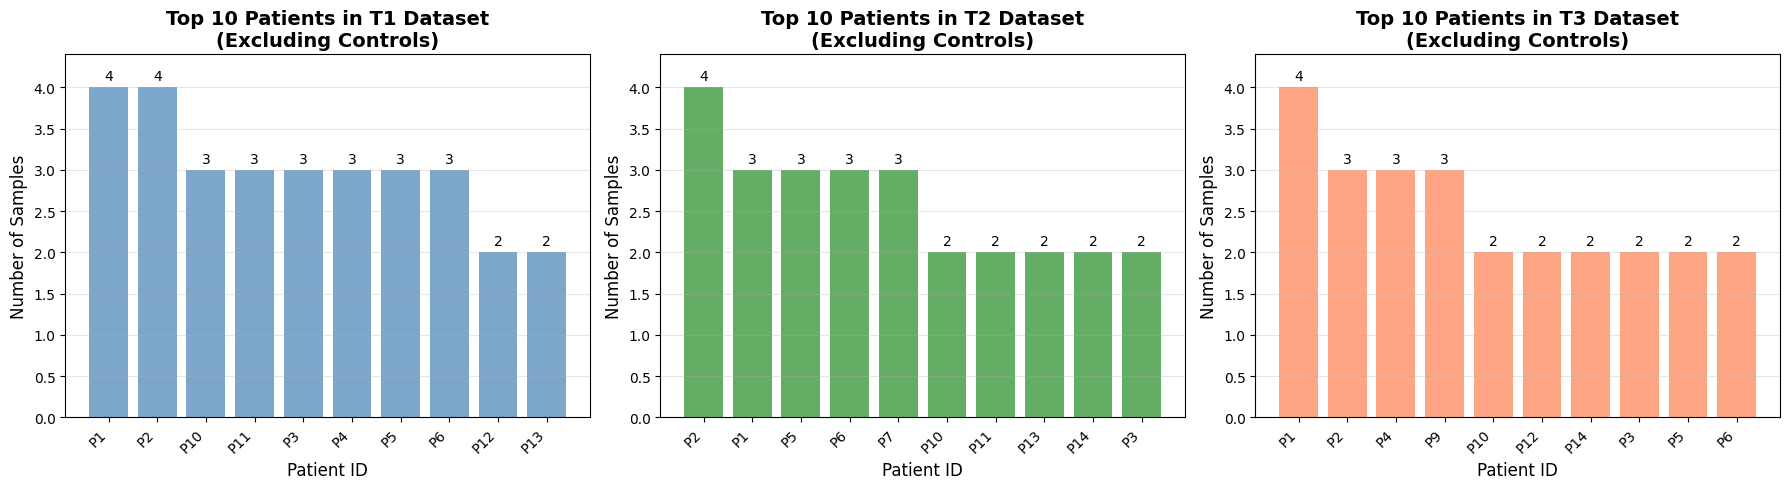


=== Summary Statistics for df_T1, df_T2, df_T3 ===

T1 Dataset - Top 10 Patients (Excluding Controls):
  Total allergic samples in df_T1: 210
  Total unique allergic patients: 186
  Mean samples for top 10: 3.00
  Range: 2 - 4

Top 10 patients in T1:
patient_ID  count
        P1      4
        P2      4
       P10      3
       P11      3
        P3      3
        P4      3
        P5      3
        P6      3
       P12      2
       P13      2


T2 Dataset - Top 10 Patients (Excluding Controls):
  Total allergic samples in df_T2: 141
  Total unique allergic patients: 122
  Mean samples for top 10: 2.60
  Range: 2 - 4

Top 10 patients in T2:
patient_ID  count
        P2      4
        P1      3
        P5      3
        P6      3
        P7      3
       P10      2
       P11      2
       P13      2
       P14      2
        P3      2


T3 Dataset - Top 10 Patients (Excluding Controls):
  Total allergic samples in df_T3: 109
  Total unique allergic patients: 92
  Mean samples for top

In [41]:
# Join df_T1, df_T2, df_T3 with result_time_df_exp_renamed to get patient_ID
df_T1_with_patient = df_T1.merge(
    result_time_df_exp_renamed[['ERS_ID', 'patient_ID']], 
    on='ERS_ID', 
    how='left'
)

df_T2_with_patient = df_T2.merge(
    result_time_df_exp_renamed[['ERS_ID', 'patient_ID']], 
    on='ERS_ID', 
    how='left'
)

df_T3_with_patient = df_T3.merge(
    result_time_df_exp_renamed[['ERS_ID', 'patient_ID']], 
    on='ERS_ID', 
    how='left'
)

# Exclude controls (Label = 0) and count samples per patient
t1_patient_counts = df_T1_with_patient[df_T1_with_patient['Label'] == 1].groupby('patient_ID').size().reset_index(name='count')
t2_patient_counts = df_T2_with_patient[df_T2_with_patient['Label'] == 1].groupby('patient_ID').size().reset_index(name='count')
t3_patient_counts = df_T3_with_patient[df_T3_with_patient['Label'] == 1].groupby('patient_ID').size().reset_index(name='count')

# Get top 10 patients by count for each timepoint
t1_top10 = t1_patient_counts.nlargest(10, 'count').sort_values('count', ascending=False)
t2_top10 = t2_patient_counts.nlargest(10, 'count').sort_values('count', ascending=False)
t3_top10 = t3_patient_counts.nlargest(10, 'count').sort_values('count', ascending=False)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for T1
axes[0].bar(range(len(t1_top10)), t1_top10['count'], color='steelblue', alpha=0.7)
axes[0].set_xticks(range(len(t1_top10)))
axes[0].set_xticklabels(t1_top10['patient_ID'], rotation=45, ha='right')
axes[0].set_xlabel('Patient ID', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Top 10 Patients in T1 Dataset\n(Excluding Controls)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, max(t1_top10['count']) * 1.1 if len(t1_top10) > 0 else 1)

# Add value labels on bars
for i, v in enumerate(t1_top10['count']):
    axes[0].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

# Plot for T2
axes[1].bar(range(len(t2_top10)), t2_top10['count'], color='forestgreen', alpha=0.7)
axes[1].set_xticks(range(len(t2_top10)))
axes[1].set_xticklabels(t2_top10['patient_ID'], rotation=45, ha='right')
axes[1].set_xlabel('Patient ID', fontsize=12)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_title('Top 10 Patients in T2 Dataset\n(Excluding Controls)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(t2_top10['count']) * 1.1 if len(t2_top10) > 0 else 1)

# Add value labels on bars
for i, v in enumerate(t2_top10['count']):
    axes[1].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

# Plot for T3
axes[2].bar(range(len(t3_top10)), t3_top10['count'], color='coral', alpha=0.7)
axes[2].set_xticks(range(len(t3_top10)))
axes[2].set_xticklabels(t3_top10['patient_ID'], rotation=45, ha='right')
axes[2].set_xlabel('Patient ID', fontsize=12)
axes[2].set_ylabel('Number of Samples', fontsize=12)
axes[2].set_title('Top 10 Patients in T3 Dataset\n(Excluding Controls)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_ylim(0, max(t3_top10['count']) * 1.1 if len(t3_top10) > 0 else 1)

# Add value labels on bars
for i, v in enumerate(t3_top10['count']):
    axes[2].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('top10_patients_T1_T2_T3_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n=== Summary Statistics for df_T1, df_T2, df_T3 ===\n")
print(f"T1 Dataset - Top 10 Patients (Excluding Controls):")
print(f"  Total allergic samples in df_T1: {len(df_T1_with_patient[df_T1_with_patient['Label'] == 1])}")
print(f"  Total unique allergic patients: {len(t1_patient_counts)}")
print(f"  Mean samples for top 10: {t1_top10['count'].mean():.2f}")
print(f"  Range: {t1_top10['count'].min()} - {t1_top10['count'].max()}")
print(f"\nTop 10 patients in T1:")
print(t1_top10.to_string(index=False))

print(f"\n\nT2 Dataset - Top 10 Patients (Excluding Controls):")
print(f"  Total allergic samples in df_T2: {len(df_T2_with_patient[df_T2_with_patient['Label'] == 1])}")
print(f"  Total unique allergic patients: {len(t2_patient_counts)}")
print(f"  Mean samples for top 10: {t2_top10['count'].mean():.2f}")
print(f"  Range: {t2_top10['count'].min()} - {t2_top10['count'].max()}")
print(f"\nTop 10 patients in T2:")
print(t2_top10.to_string(index=False))

print(f"\n\nT3 Dataset - Top 10 Patients (Excluding Controls):")
print(f"  Total allergic samples in df_T3: {len(df_T3_with_patient[df_T3_with_patient['Label'] == 1])}")
print(f"  Total unique allergic patients: {len(t3_patient_counts)}")
print(f"  Mean samples for top 10: {t3_top10['count'].mean():.2f}")
print(f"  Range: {t3_top10['count'].min()} - {t3_top10['count'].max()}")
print(f"\nTop 10 patients in T3:")
print(t3_top10.to_string(index=False))

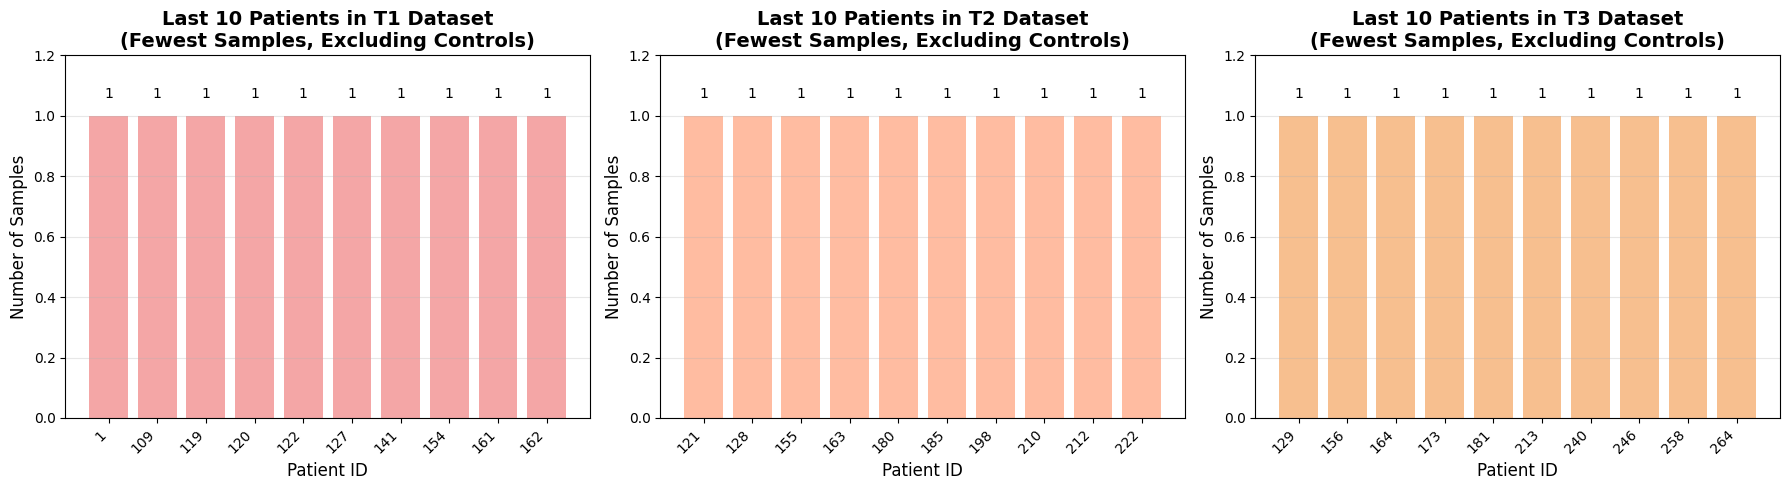


=== Summary Statistics for LAST 10 Patients (Fewest Samples) ===

T1 Dataset - Last 10 Patients (Excluding Controls):
  Mean samples for last 10: 1.00
  Range: 1 - 1

Last 10 patients in T1:
patient_ID  count
         1      1
       109      1
       119      1
       120      1
       122      1
       127      1
       141      1
       154      1
       161      1
       162      1


T2 Dataset - Last 10 Patients (Excluding Controls):
  Mean samples for last 10: 1.00
  Range: 1 - 1

Last 10 patients in T2:
patient_ID  count
       121      1
       128      1
       155      1
       163      1
       180      1
       185      1
       198      1
       210      1
       212      1
       222      1


T3 Dataset - Last 10 Patients (Excluding Controls):
  Mean samples for last 10: 1.00
  Range: 1 - 1

Last 10 patients in T3:
patient_ID  count
       129      1
       156      1
       164      1
       173      1
       181      1
       213      1
       240      1
       246    

In [42]:
# Get last 10 patients by count for each timepoint (those with fewest samples)
t1_last10 = t1_patient_counts.nsmallest(10, 'count').sort_values('count', ascending=True)
t2_last10 = t2_patient_counts.nsmallest(10, 'count').sort_values('count', ascending=True)
t3_last10 = t3_patient_counts.nsmallest(10, 'count').sort_values('count', ascending=True)

# Create figure with 3 subplots for LAST 10
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for T1 - Last 10
axes[0].bar(range(len(t1_last10)), t1_last10['count'], color='lightcoral', alpha=0.7)
axes[0].set_xticks(range(len(t1_last10)))
axes[0].set_xticklabels(t1_last10['patient_ID'], rotation=45, ha='right')
axes[0].set_xlabel('Patient ID', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Last 10 Patients in T1 Dataset\n(Fewest Samples, Excluding Controls)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, max(t1_last10['count']) * 1.2 if len(t1_last10) > 0 else 1)

# Add value labels on bars
for i, v in enumerate(t1_last10['count']):
    axes[0].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

# Plot for T2 - Last 10
axes[1].bar(range(len(t2_last10)), t2_last10['count'], color='lightsalmon', alpha=0.7)
axes[1].set_xticks(range(len(t2_last10)))
axes[1].set_xticklabels(t2_last10['patient_ID'], rotation=45, ha='right')
axes[1].set_xlabel('Patient ID', fontsize=12)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_title('Last 10 Patients in T2 Dataset\n(Fewest Samples, Excluding Controls)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(t2_last10['count']) * 1.2 if len(t2_last10) > 0 else 1)

# Add value labels on bars
for i, v in enumerate(t2_last10['count']):
    axes[1].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

# Plot for T3 - Last 10
axes[2].bar(range(len(t3_last10)), t3_last10['count'], color='sandybrown', alpha=0.7)
axes[2].set_xticks(range(len(t3_last10)))
axes[2].set_xticklabels(t3_last10['patient_ID'], rotation=45, ha='right')
axes[2].set_xlabel('Patient ID', fontsize=12)
axes[2].set_ylabel('Number of Samples', fontsize=12)
axes[2].set_title('Last 10 Patients in T3 Dataset\n(Fewest Samples, Excluding Controls)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_ylim(0, max(t3_last10['count']) * 1.2 if len(t3_last10) > 0 else 1)

# Add value labels on bars
for i, v in enumerate(t3_last10['count']):
    axes[2].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('last10_patients_T1_T2_T3_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics for LAST 10
print("\n=== Summary Statistics for LAST 10 Patients (Fewest Samples) ===\n")
print(f"T1 Dataset - Last 10 Patients (Excluding Controls):")
print(f"  Mean samples for last 10: {t1_last10['count'].mean():.2f}")
print(f"  Range: {t1_last10['count'].min()} - {t1_last10['count'].max()}")
print(f"\nLast 10 patients in T1:")
print(t1_last10.to_string(index=False))

print(f"\n\nT2 Dataset - Last 10 Patients (Excluding Controls):")
print(f"  Mean samples for last 10: {t2_last10['count'].mean():.2f}")
print(f"  Range: {t2_last10['count'].min()} - {t2_last10['count'].max()}")
print(f"\nLast 10 patients in T2:")
print(t2_last10.to_string(index=False))

print(f"\n\nT3 Dataset - Last 10 Patients (Excluding Controls):")
print(f"  Mean samples for last 10: {t3_last10['count'].mean():.2f}")
print(f"  Range: {t3_last10['count'].min()} - {t3_last10['count'].max()}")
print(f"\nLast 10 patients in T3:")
print(t3_last10.to_string(index=False))

In [43]:
# Get top 30 patients by count for each timepoint, sorted in descending order
t1_top30 = t1_patient_counts.nlargest(30, 'count').sort_values('count', ascending=False)
t2_top30 = t2_patient_counts.nlargest(30, 'count').sort_values('count', ascending=False)
t3_top30 = t3_patient_counts.nlargest(30, 'count').sort_values('count', ascending=False)

# Function to get ERS_IDs for each patient in the top 30
def get_patient_details(top_patients, df_with_patient):
    """
    For each patient in top_patients, get all their ERS_IDs from the dataset
    """
    details = []
    for _, row in top_patients.iterrows():
        patient_id = row['patient_ID']
        count = row['count']
        
        # Get all ERS_IDs for this patient (excluding controls)
        patient_data = df_with_patient[
            (df_with_patient['patient_ID'] == patient_id) & 
            (df_with_patient['Label'] == 1)
        ]
        ers_ids = patient_data['ERS_ID'].tolist()
        
        details.append({
            'patient_ID': patient_id,
            'sample_count': count,
            'ERS_IDs': ', '.join(ers_ids)
        })
    
    return pd.DataFrame(details)

# Get detailed information for top 30 in each dataset
t1_top30_details = get_patient_details(t1_top30, df_T1_with_patient)
t2_top30_details = get_patient_details(t2_top30, df_T2_with_patient)
t3_top30_details = get_patient_details(t3_top30, df_T3_with_patient)

# Sort by patient_ID for ordered display
t1_top30_ordered = t1_top30_details.sort_values('patient_ID')
t2_top30_ordered = t2_top30_details.sort_values('patient_ID')
t3_top30_ordered = t3_top30_details.sort_values('patient_ID')

# Display the results
print("\n" + "="*100)
print("TOP 30 PATIENTS (ORDERED BY PATIENT_ID) WITH ERS_IDs")
print("="*100)

print("\n### T1 Dataset - Top 30 Patients (Excluding Controls) ###")
print(f"Total patients: {len(t1_patient_counts)}")
print("-" * 100)
for idx, row in t1_top30_ordered.iterrows():
    print(f"Patient: {row['patient_ID']:<10} | Samples: {row['sample_count']:<3} | ERS_IDs: {row['ERS_IDs']}")

print("\n\n### T2 Dataset - Top 30 Patients (Excluding Controls) ###")
print(f"Total patients: {len(t2_patient_counts)}")
print("-" * 100)
for idx, row in t2_top30_ordered.iterrows():
    print(f"Patient: {row['patient_ID']:<10} | Samples: {row['sample_count']:<3} | ERS_IDs: {row['ERS_IDs']}")

print("\n\n### T3 Dataset - Top 30 Patients (Excluding Controls) ###")
print(f"Total patients: {len(t3_patient_counts)}")
print("-" * 100)
for idx, row in t3_top30_ordered.iterrows():
    print(f"Patient: {row['patient_ID']:<10} | Samples: {row['sample_count']:<3} | ERS_IDs: {row['ERS_IDs']}")




TOP 30 PATIENTS (ORDERED BY PATIENT_ID) WITH ERS_IDs

### T1 Dataset - Top 30 Patients (Excluding Controls) ###
Total patients: 186
----------------------------------------------------------------------------------------------------
Patient: 1          | Samples: 1   | ERS_IDs: ERS4519007
Patient: 109        | Samples: 1   | ERS_IDs: ERS4519212
Patient: 119        | Samples: 1   | ERS_IDs: ERS4519041
Patient: 120        | Samples: 1   | ERS_IDs: ERS4519213
Patient: 122        | Samples: 1   | ERS_IDs: ERS4519042
Patient: 127        | Samples: 1   | ERS_IDs: ERS4519214
Patient: 141        | Samples: 1   | ERS_IDs: ERS4519008
Patient: 154        | Samples: 1   | ERS_IDs: ERS4519009
Patient: 161        | Samples: 1   | ERS_IDs: ERS4519010
Patient: 162        | Samples: 1   | ERS_IDs: ERS4519215
Patient: 169        | Samples: 1   | ERS_IDs: ERS4519043
Patient: 179        | Samples: 1   | ERS_IDs: ERS4519044
Patient: 184        | Samples: 1   | ERS_IDs: ERS4519216
Patient: 187        | Sam

In [44]:
df2_merged = result_df_exp.merge(df_run[['Run', 'anonymized_name','Trial','run_date (exp)']], on='Run', how='left')
result_time_df2_exp=df2_merged.copy()
df_T1_no_controls = df_T1_with_patient[df_T1_with_patient['Label'] == 1].copy()
df_T2_no_controls = df_T2_with_patient[df_T2_with_patient['Label'] == 1].copy()
df_T3_no_controls = df_T3_with_patient[df_T3_with_patient['Label'] == 1].copy()  # Fixed!

In [45]:
# Left join to add run_date, anonymized_name, and run
df_T1_no_controls = df_T1_no_controls.merge(
    result_time_df2_exp[['ERS_ID', 'Trial', 'anonymized_name', 'Run', 'run_date (exp)']], 
    on=['ERS_ID', 'Trial'],
    how='left'
)

In [46]:
# Left join to add run_date, anonymized_name, and run
df_T2_no_controls = df_T2_no_controls.merge(
    result_time_df2_exp[['ERS_ID', 'Trial', 'anonymized_name', 'Run', 'run_date (exp)']], 
    on=['ERS_ID', 'Trial'],
    how='left'
)

In [47]:
# Left join to add run_date, anonymized_name, and run
df_T3_no_controls = df_T3_no_controls.merge(
    result_time_df2_exp[['ERS_ID', 'Trial', 'anonymized_name', 'Run', 'run_date (exp)']], 
    on=['ERS_ID', 'Trial'],
    how='left'
)

In [48]:
# Function to get ERS_IDs and run dates for each patient in the top 30
def get_patient_details_with_dates(top_patients, df_with_patient):
    """
    For each patient in top_patients, get all their ERS_IDs and run dates from the dataset
    """
    details = []
    for _, row in top_patients.iterrows():
        patient_id = row['patient_ID']
        count = row['count']
        
        # Get all ERS_IDs and run dates for this patient (excluding controls)
        patient_data = df_with_patient[
            (df_with_patient['patient_ID'] == patient_id) & 
            (df_with_patient['Label'] == 1)
        ]
        
        # Create a list of ERS_ID with their corresponding run dates
        ers_with_dates = []
        for _, sample in patient_data.iterrows():
            ers_id = sample['ERS_ID']
            run_date = sample.get('run_date (exp)', 'N/A')  # Use .get() in case column doesn't exist
            ers_with_dates.append(f"{ers_id} ({run_date})")
        
        details.append({
            'patient_ID': patient_id,
            'sample_count': count,
            'ERS_IDs_with_dates': ' | '.join(ers_with_dates)
        })
    
    return pd.DataFrame(details)

# Get detailed information with run dates for top 30 in each dataset
t1_top30_details_dates = get_patient_details_with_dates(t1_top30, df_T1_no_controls)
t2_top30_details_dates = get_patient_details_with_dates(t2_top30, df_T2_no_controls)
t3_top30_details_dates = get_patient_details_with_dates(t3_top30, df_T3_no_controls)

# Sort by patient_ID for ordered display
t1_top30_ordered_dates = t1_top30_details_dates.sort_values('patient_ID')
t2_top30_ordered_dates = t2_top30_details_dates.sort_values('patient_ID')
t3_top30_ordered_dates = t3_top30_details_dates.sort_values('patient_ID')

# Display the results
print("\n" + "="*120)
print("TOP 30 PATIENTS (ORDERED BY PATIENT_ID) WITH ERS_IDs AND RUN DATES")
print("="*120)

print("\n### T1 Dataset - Top 30 Patients with Run Dates ###")
print(f"Total patients: {len(t1_patient_counts)}")
print("-" * 120)
for idx, row in t1_top30_ordered_dates.iterrows():
    print(f"Patient: {row['patient_ID']:<10} | Samples: {row['sample_count']:<3} | ERS_IDs (Run Dates): {row['ERS_IDs_with_dates']}")

print("\n\n### T2 Dataset - Top 30 Patients with Run Dates ###")
print(f"Total patients: {len(t2_patient_counts)}")
print("-" * 120)
for idx, row in t2_top30_ordered_dates.iterrows():
    print(f"Patient: {row['patient_ID']:<10} | Samples: {row['sample_count']:<3} | ERS_IDs (Run Dates): {row['ERS_IDs_with_dates']}")

print("\n\n### T3 Dataset - Top 30 Patients with Run Dates ###")
print(f"Total patients: {len(t3_patient_counts)}")
print("-" * 120)
for idx, row in t3_top30_ordered_dates.iterrows():
    print(f"Patient: {row['patient_ID']:<10} | Samples: {row['sample_count']:<3} | ERS_IDs (Run Dates): {row['ERS_IDs_with_dates']}")




TOP 30 PATIENTS (ORDERED BY PATIENT_ID) WITH ERS_IDs AND RUN DATES

### T1 Dataset - Top 30 Patients with Run Dates ###
Total patients: 186
------------------------------------------------------------------------------------------------------------------------
Patient: 1          | Samples: 1   | ERS_IDs (Run Dates): ERS4519007 (22/03/2018)
Patient: 109        | Samples: 1   | ERS_IDs (Run Dates): ERS4519212 (22/03/2018)
Patient: 119        | Samples: 1   | ERS_IDs (Run Dates): ERS4519041 (22/03/2018)
Patient: 120        | Samples: 1   | ERS_IDs (Run Dates): ERS4519213 (22/03/2018)
Patient: 122        | Samples: 1   | ERS_IDs (Run Dates): ERS4519042 (22/03/2018)
Patient: 127        | Samples: 1   | ERS_IDs (Run Dates): ERS4519214 (22/03/2018)
Patient: 141        | Samples: 1   | ERS_IDs (Run Dates): ERS4519008 (22/03/2018)
Patient: 154        | Samples: 1   | ERS_IDs (Run Dates): ERS4519009 (22/03/2018)
Patient: 161        | Samples: 1   | ERS_IDs (Run Dates): ERS4519010 (22/03/2018)


In [49]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)



In [50]:
print(t1_top30_ordered_dates[t1_top30_ordered_dates['patient_ID'] == 'P1'][['patient_ID', 'ERS_IDs_with_dates']])

  patient_ID  \
0         P1   

                                                                                      ERS_IDs_with_dates  
0  ERS4516182 (26/07/2017) | ERS4516672 (15/07/2017) | ERS4516680 (15/07/2017) | ERS4516683 (15/07/2017)  


In [51]:
print(t2_top30_ordered_dates[t2_top30_ordered_dates['patient_ID'] == 'P1'][['patient_ID', 'ERS_IDs_with_dates']])

  patient_ID  \
1         P1   

                                                            ERS_IDs_with_dates  
1  ERS4516183 (26/07/2017) | ERS4516673 (15/07/2017) | ERS4516684 (15/07/2017)  


In [52]:
print(t3_top30_ordered_dates[t3_top30_ordered_dates['patient_ID'] == 'P1'][['patient_ID', 'ERS_IDs_with_dates']])

  patient_ID  \
0         P1   

                                                                                      ERS_IDs_with_dates  
0  ERS4516674 (15/07/2017) | ERS4516675 (15/07/2017) | ERS4516681 (15/07/2017) | ERS4516685 (15/07/2017)  


In [53]:
print(t1_top30_ordered_dates[t1_top30_ordered_dates['patient_ID'] == '1'][['patient_ID', 'ERS_IDs_with_dates']])

   patient_ID       ERS_IDs_with_dates
14          1  ERS4519007 (22/03/2018)


In [54]:
print(t2_top30_ordered_dates[t2_top30_ordered_dates['patient_ID'] == '121'][['patient_ID', 'ERS_IDs_with_dates']])

   patient_ID       ERS_IDs_with_dates
13        121  ERS4519248 (22/03/2018)


In [55]:
print(t3_top30_ordered_dates[t3_top30_ordered_dates['patient_ID'] == '129'][['patient_ID', 'ERS_IDs_with_dates']])

   patient_ID       ERS_IDs_with_dates
12        129  ERS4519269 (22/03/2018)
